In [816]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [559]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [249]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (15, 9)})

In [219]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16718
Data columns (total 16 columns):
Name               16444 non-null object
Platform           16446 non-null object
Year_of_Release    16446 non-null float64
Genre              16444 non-null object
Publisher          16414 non-null object
NA_Sales           16446 non-null float64
EU_Sales           16446 non-null float64
JP_Sales           16446 non-null float64
Other_Sales        16446 non-null float64
Global_Sales       16446 non-null float64
Critic_Score       7983 non-null float64
Critic_Count       7983 non-null float64
User_Score         7463 non-null float64
User_Count         7463 non-null float64
Developer          9906 non-null object
Rating             9768 non-null object
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


In [780]:
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')*10

In [781]:
df['NA_Sales'] = df['NA_Sales'] *1000000
df['EU_Sales'] = df['EU_Sales'] *1000000
df['JP_Sales'] = df['JP_Sales'] *1000000
df['Other_Sales'] = df['Other_Sales'] *1000000
df['Global_Sales'] = df['Global_Sales'] *1000000

In [783]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

User_Count         54.539361
User_Score         54.539361
Critic_Count       51.364855
Critic_Score       51.364855
Rating             40.494760
Developer          39.660005
Global_Sales        0.000000
Other_Sales         0.000000
JP_Sales            0.000000
EU_Sales            0.000000
NA_Sales            0.000000
Publisher           0.000000
Genre               0.000000
Year_of_Release     0.000000
Platform            0.000000
Name                0.000000
dtype: float64

About 6 columns are missing around 50% of their values. I think one of the reason is the prevalence of older consoles, that were around before the internet and reviews became common for games. It would be useful to split the data by the year the internet became mainstream in order to see how the missing values compare.

In [230]:
null_list = []
for year in range(1980,2017):
    null_list.append(df[df['Year_of_Release']==year].isnull().sum()['User_Count']/len(df[df['Year_of_Release']==year]))

In [231]:
null_by_year = pd.DataFrame(null_list, list(np.arange(1980,2017)))

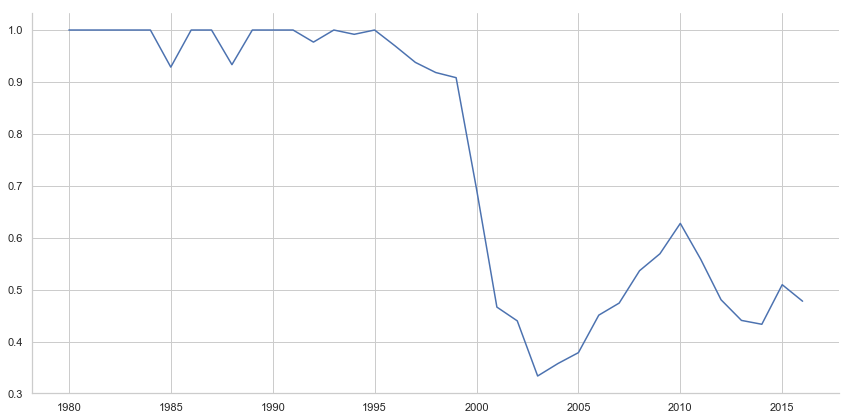

In [270]:
sns.relplot(data=null_by_year, kind='line', legend=False, height=6, aspect=2)

As I figured, there is a significant decline in missing review data of videogames starting in 1995. That makes sense, since that's when windows 95 came out and the internet started becoming mainstream, allowing for this industry to arise. However, there is an increase from about 2003-2010. My best guess is this is due to the gaming boom during the PS2 era, when so many games were coming out that it wasn't possible for reviewers to do every single one 

In [562]:
df = df[df['Year_of_Release'] < 2017]

In [234]:
temp1 = df.groupby(['Year_of_Release']).count()
temp1 = temp1.reset_index()

temp2 = df.groupby(['Year_of_Release']).sum()
temp2 = temp2.reset_index()

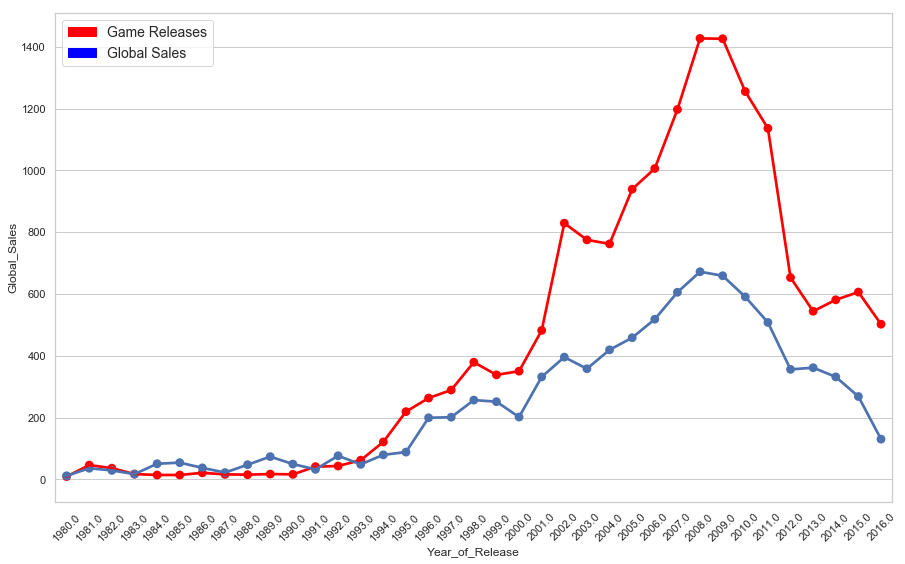

In [511]:
plt.figure(figsize=(15, 9))
plt.xticks(rotation=45)
sns.pointplot(data=temp1, x='Year_of_Release', y='Global_Sales', color='Red')
sns.pointplot(data=temp2, x='Year_of_Release', y='Global_Sales')
blue_patch = mpatches.Patch(color='red', label='Game Releases')
red_patch = mpatches.Patch(color='blue', label='Global Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 14)

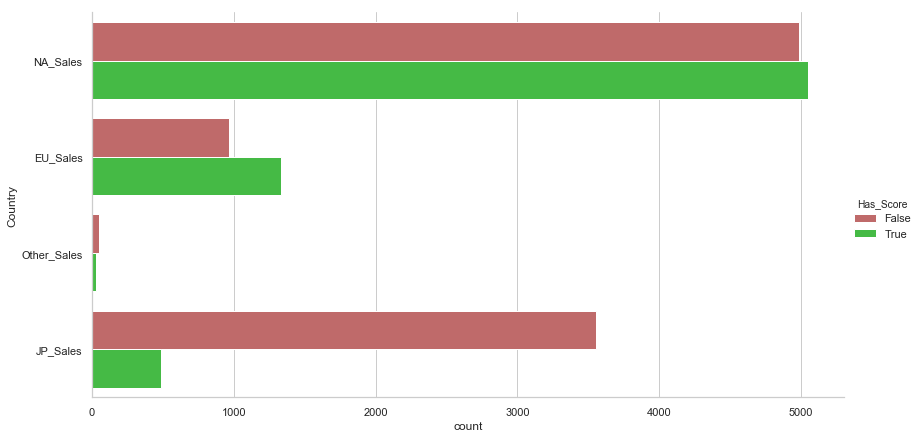

In [515]:
df["Has_Score"] = df["User_Score"].notnull() & df["Critic_Score"].notnull()
df["Country"] = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.catplot(y="Country", hue="Has_Score", data=df, height=6, aspect=2 , kind='count', palette=palette)

The first graph shows a boom in game releases and sales during the PS2 era (best selling console of all time). The increase in missing game reviews makes sense because even though the internet was much more developed than in the 90s, such a large amount of releases makes it much harder for reviewers to keep up and inevitably leads to lower quality games being published.

The second graph shows how the majority of games that were popular in Japan don't have scores by users and critics

In [343]:
clean_df = df.dropna()

In [317]:
clean_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [318]:
clean_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


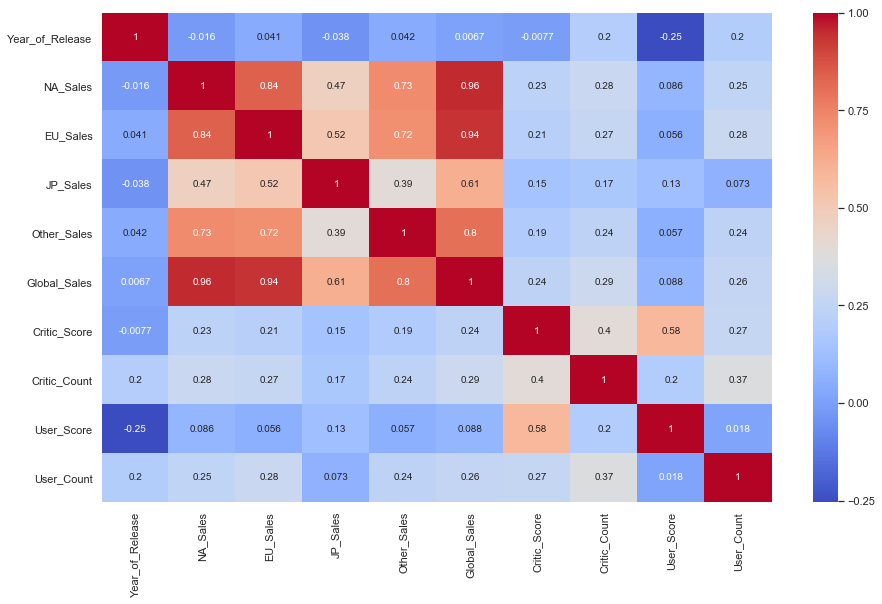

In [239]:
plt.figure(figsize=(15, 9))
sns.heatmap(clean_df.corr(), cmap='coolwarm', annot=True)

High correlation among sales except for the Japanese market, which makes sense since they have very different preferences. Global sales is highly correlated as well, since its just the aggregate of all sales. Lower correlations among the rest of the variables.

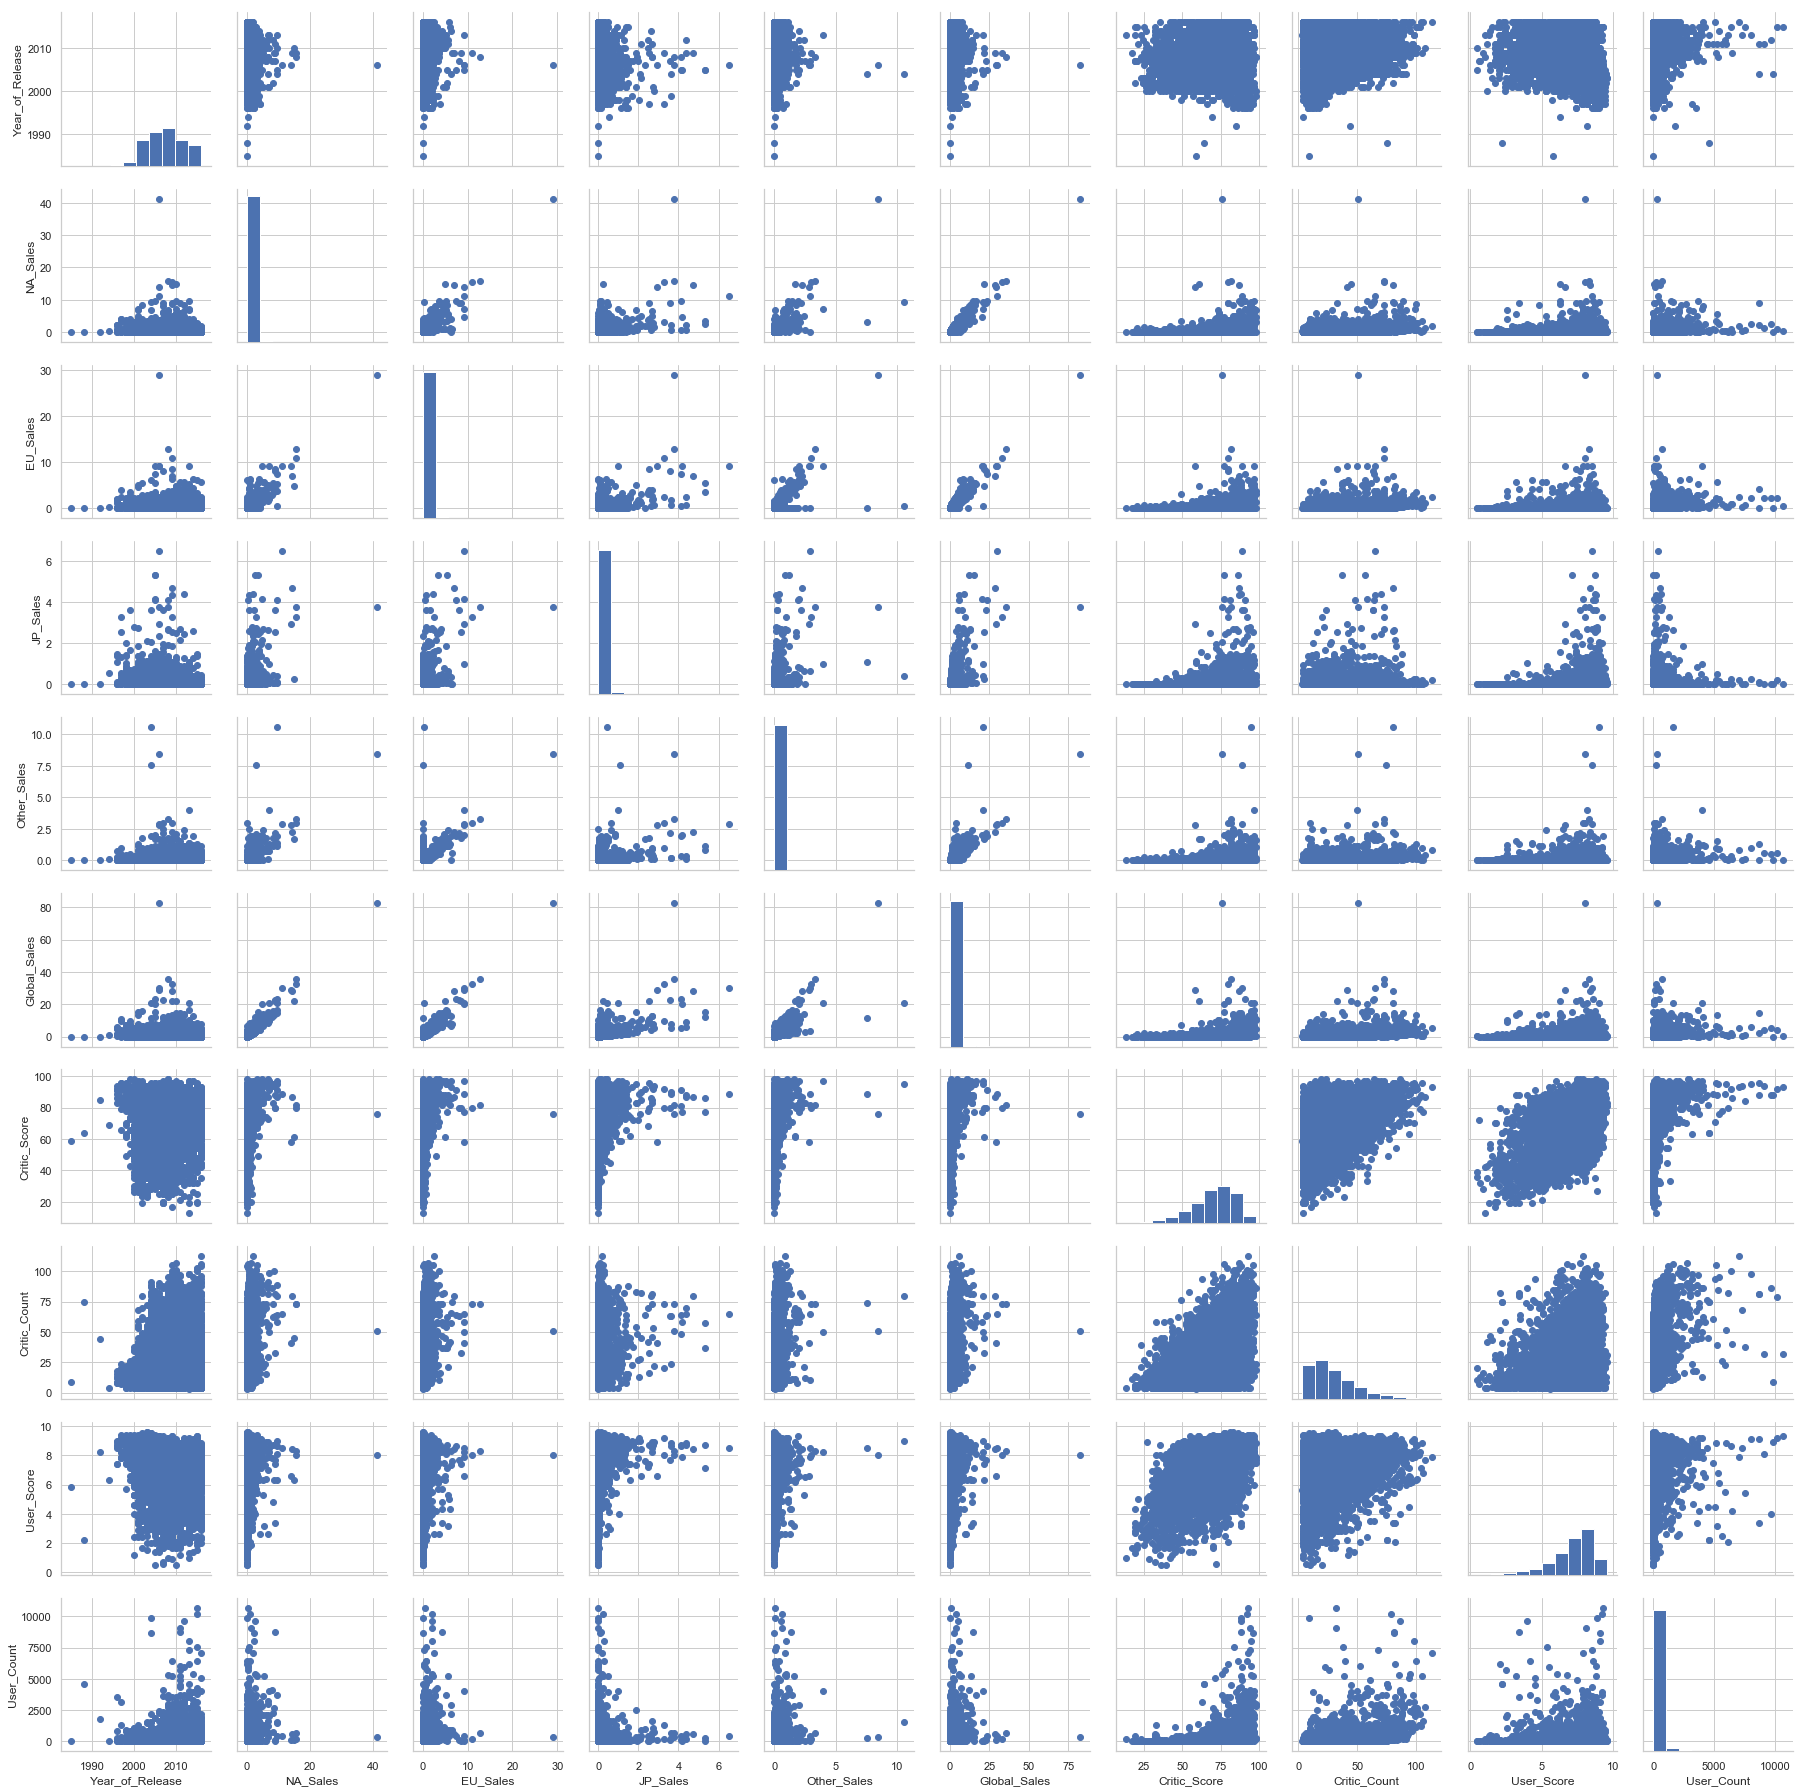

In [240]:
g = sns.PairGrid(clean_df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

Distributions seem to be normal, but skewed to one side or another. As mentioned before, colinearity is low, except for sales variables. The sales variables and user count have some pretty extreme outliers, which is why the distribution seems like a single column. Will reduce the outliers to a value of IQR*1.5

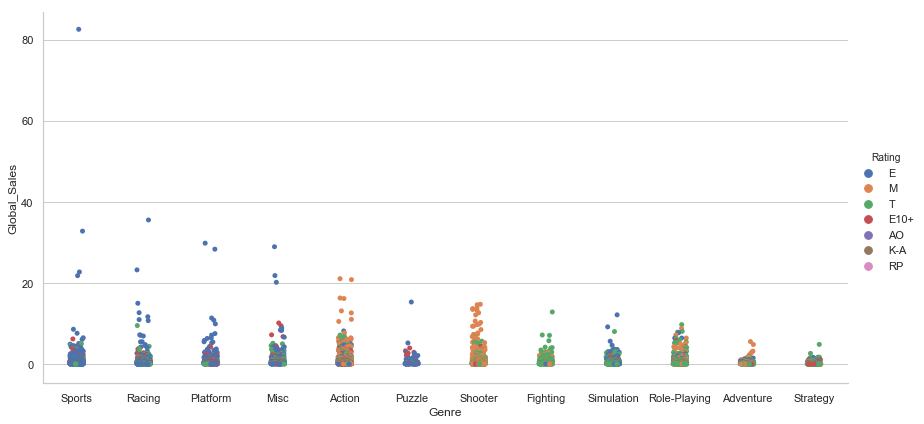

In [305]:
sns.catplot(data=clean_df, x='Genre', y='Global_Sales', height=6, aspect=2, hue='Rating')

Most of the Global Sales values are closely clustered, but there are some pretty significant outliers. This would throw off satistical metrics, so they have to be reassigned.

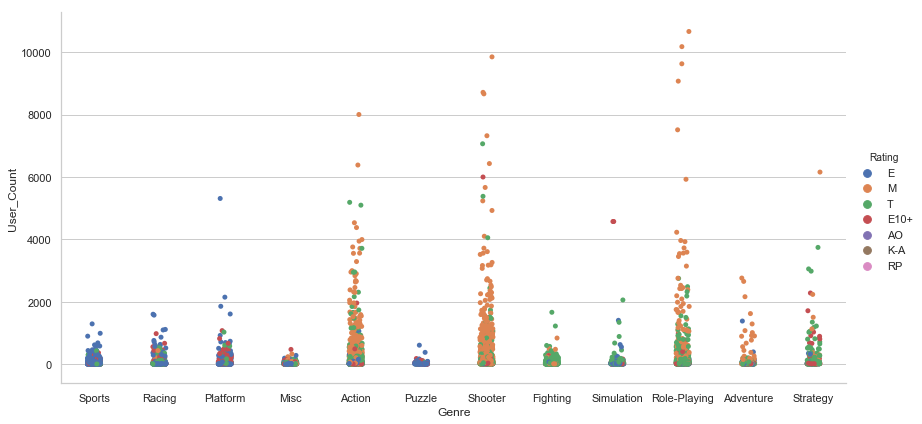

In [308]:
sns.catplot(data=clean_df, x='Genre', y='User_Count', height=6, aspect=2, hue='Rating')

Same with User count

In [341]:
def reduce_outlier(x):
    q3 = clean_df['Global_Sales'].quantile(q=0.75)
    q1 = clean_df['Global_Sales'].quantile(q=0.25)
    iqr=q3-q1
    if x > 1.5*iqr:
        return 1.5*iqr
    else:
        return x

In [311]:
outlier_columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','User_Count']

In [344]:
for column in outlier_columns:
    def reduce_outlier(x):
        q3 = clean_df[column].quantile(q=0.75)
        q1 = clean_df[column].quantile(q=0.25)
        iqr=q3-q1
        if x > 1.5*iqr:
            return 1.5*iqr
        else:
            return x
    clean_df[column] = clean_df[column].apply(reduce_outlier)

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [345]:
clean_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.495,0.285,0.015,0.09,0.96,76.0,51.0,8.0,117.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.495,0.285,0.015,0.09,0.96,82.0,73.0,8.3,117.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.495,0.285,0.015,0.09,0.96,80.0,73.0,8.0,117.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,0.495,0.285,0.015,0.09,0.96,89.0,65.0,8.5,117.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,0.495,0.285,0.015,0.09,0.96,58.0,41.0,6.6,117.0,Nintendo,E


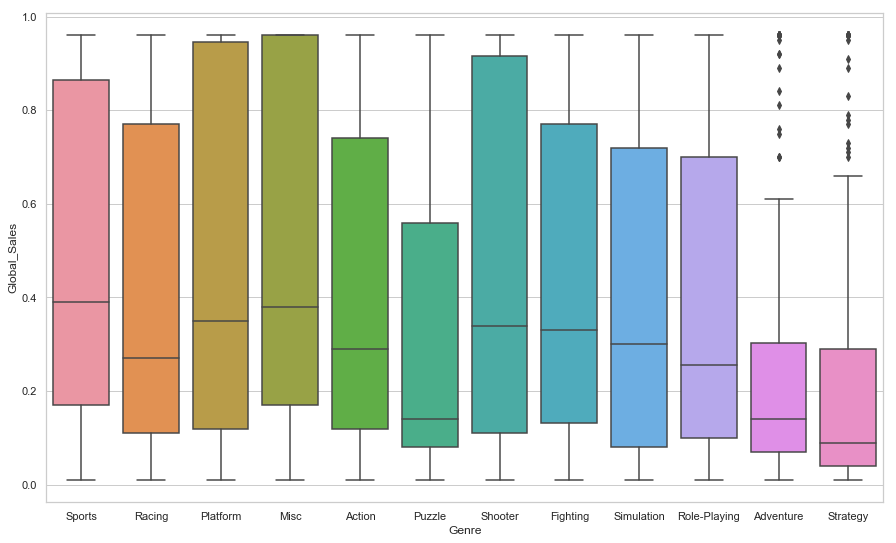

In [346]:
plt.figure(figsize=(15, 9))
sns.boxplot(x=clean_df['Genre'], y=clean_df['Global_Sales'])

Strategy and adventure game still have outliers because their sales are very low compared to other genres, but overall all outliers have been set to the IQR*1.5 value

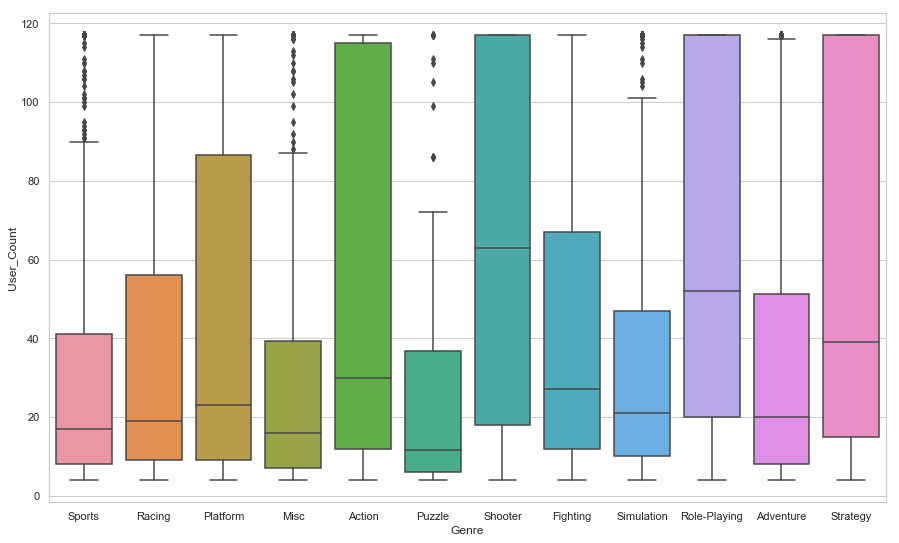

In [347]:
plt.figure(figsize=(15, 9))
sns.boxplot(x=clean_df['Genre'], y=clean_df['User_Count'])

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


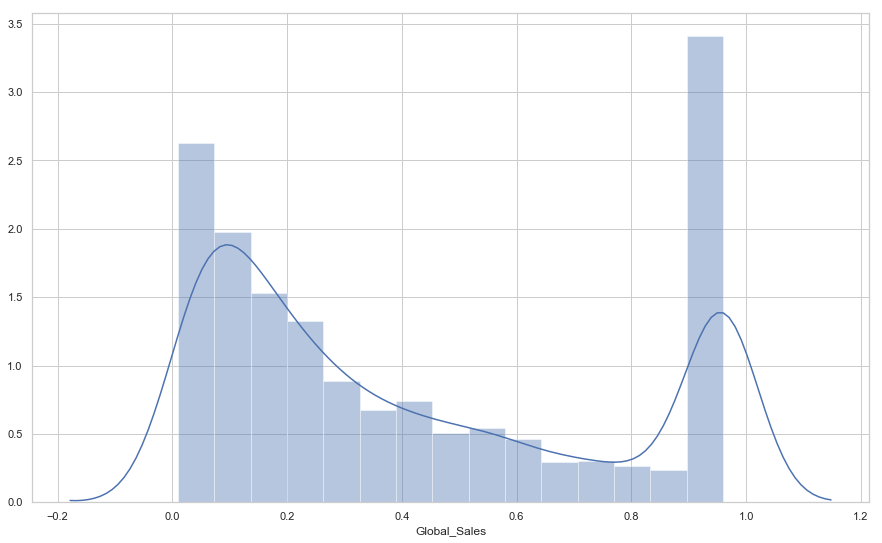

In [349]:
plt.figure(figsize=(15, 9))
sns.distplot(clean_df['Global_Sales'])

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


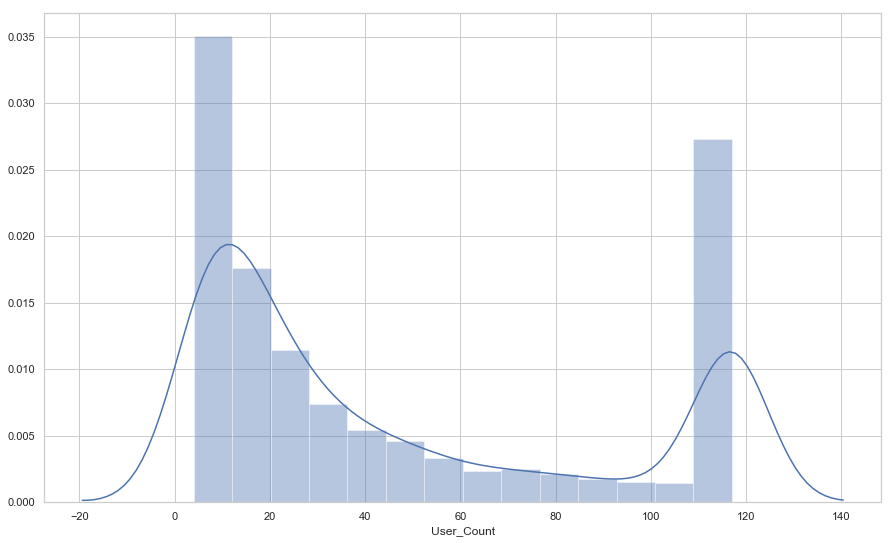

In [351]:
plt.figure(figsize=(15, 9))
sns.distplot(clean_df['User_Count'])

# Visualizations (based on original df)

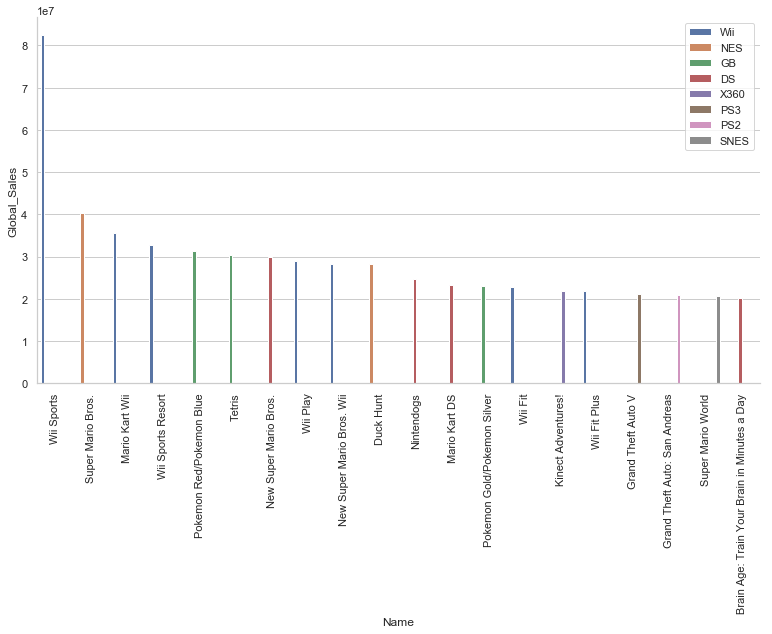

In [785]:
sns.catplot(data=df.nlargest(20,'Global_Sales'), x='Name', y='Global_Sales', kind='bar', height=6, aspect=2, hue='Platform', legend_out=False)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

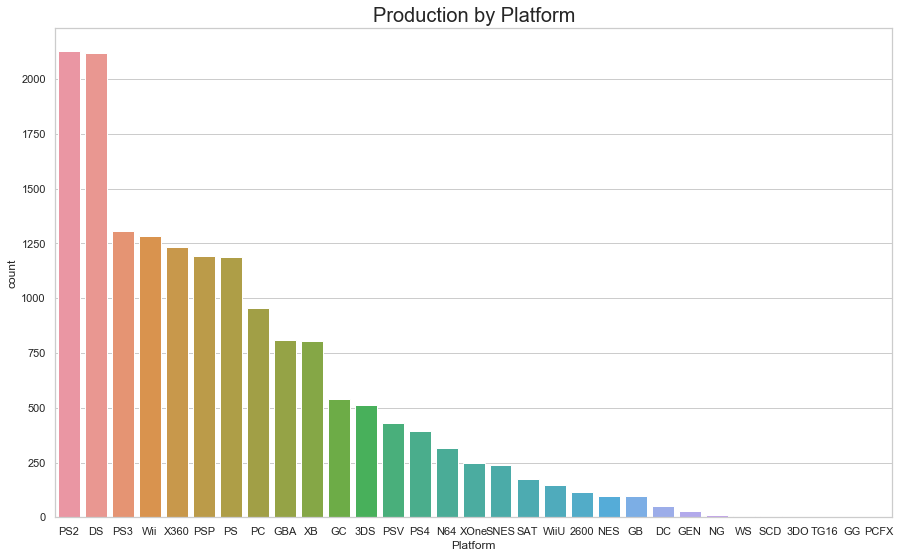

In [552]:
plt.figure(figsize=(15, 9))
plt.title('Production by Platform', fontsize=20)
sns.countplot(df['Platform'], order = df['Platform'].value_counts().index);

Sony and Nintendo are dominant in the market

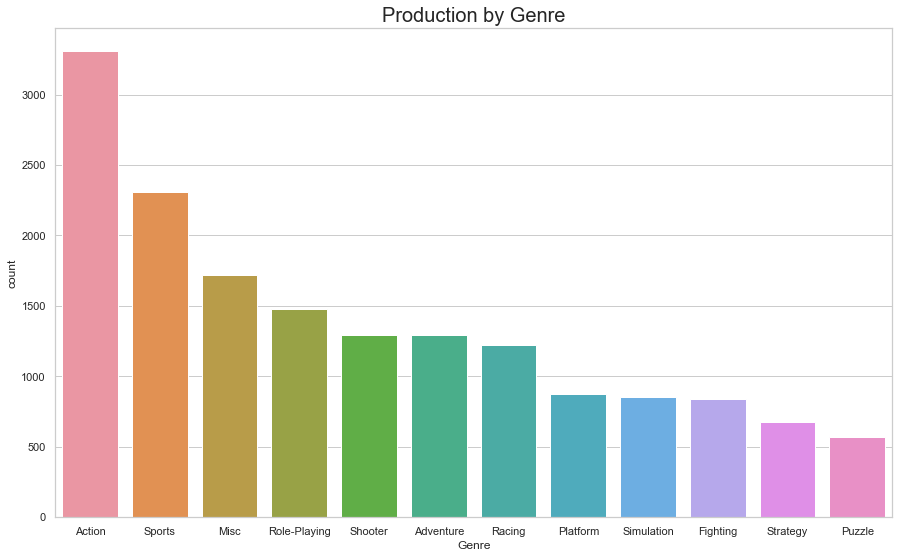

In [493]:
plt.figure(figsize=(15, 9))
plt.title('Production by Genre', fontsize=20)
sns.countplot(df['Genre'], order = df['Genre'].value_counts().index);

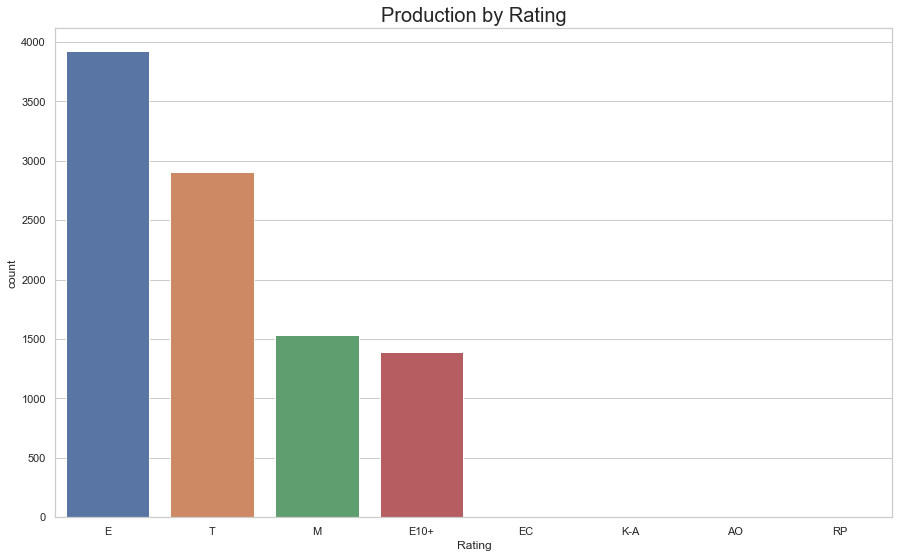

In [494]:
plt.figure(figsize=(15, 9))
plt.title('Production by Rating', fontsize=20)
sns.countplot(df['Rating'], order = df['Rating'].value_counts().index);

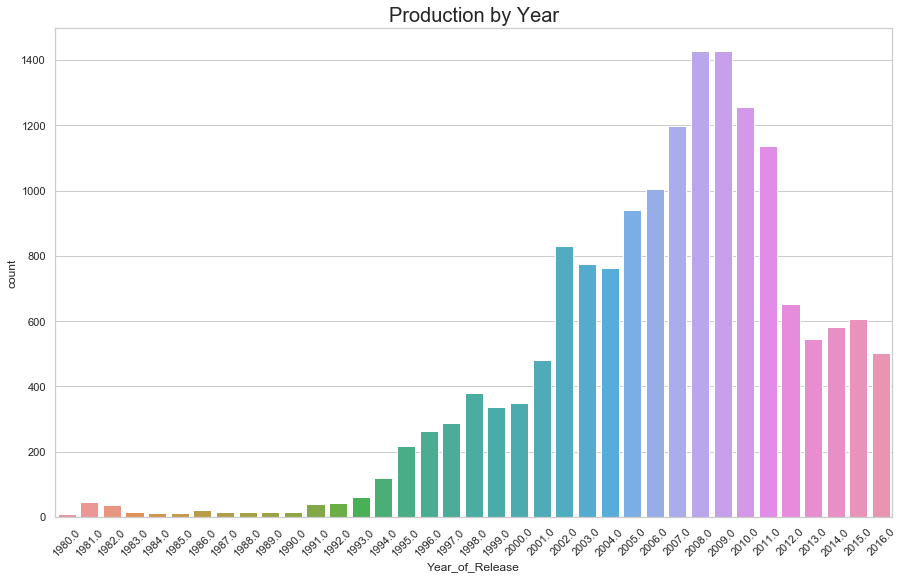

In [495]:
plt.figure(figsize=(15, 9))
plt.title('Production by Year', fontsize=20)
plt.xticks(rotation=45)
sns.countplot(df['Year_of_Release']);

The PS2 era was a boom for the industry, but seems like the financial crisis might have had an effect causing production to drop off

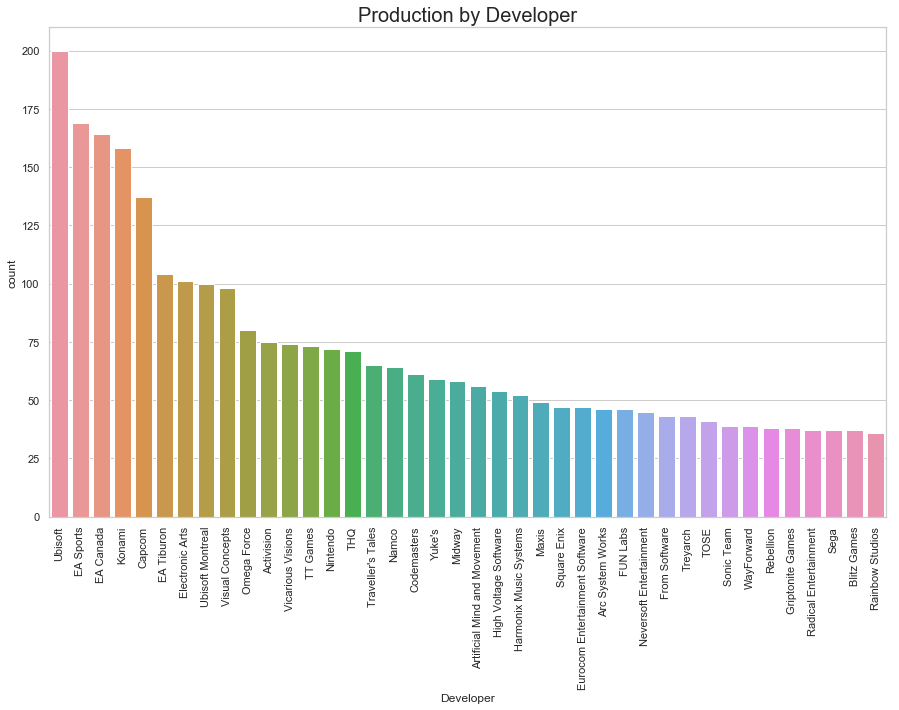

In [496]:
plt.figure(figsize=(15, 9))
plt.title('Production by Developer', fontsize=20)
plt.xticks(rotation=90)
sns.countplot(df['Developer'], order = df['Developer'].value_counts().iloc[:40].index);

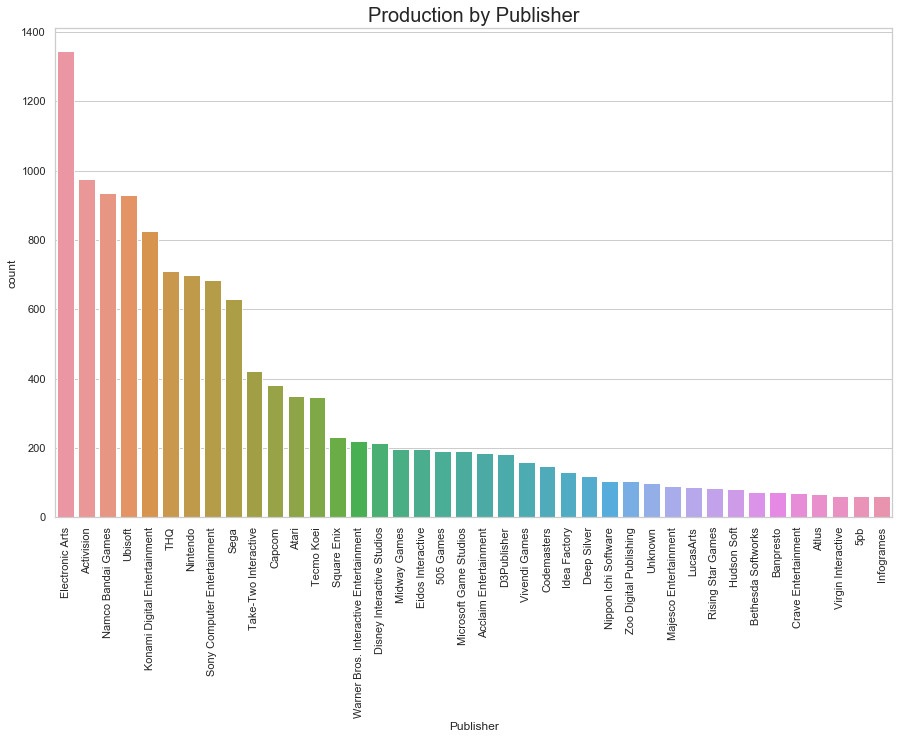

In [497]:
plt.figure(figsize=(15, 9))
plt.title('Production by Publisher', fontsize=20)
plt.xticks(rotation=90)
sns.countplot(df['Publisher'], order = df['Publisher'].value_counts().iloc[:40].index);

EA is the biggest publisher, specially when combining their divisions, which are categorized separately in this dataset. Nintendo is worth a mention since they're a developer as well

No handles with labels found to put in legend.


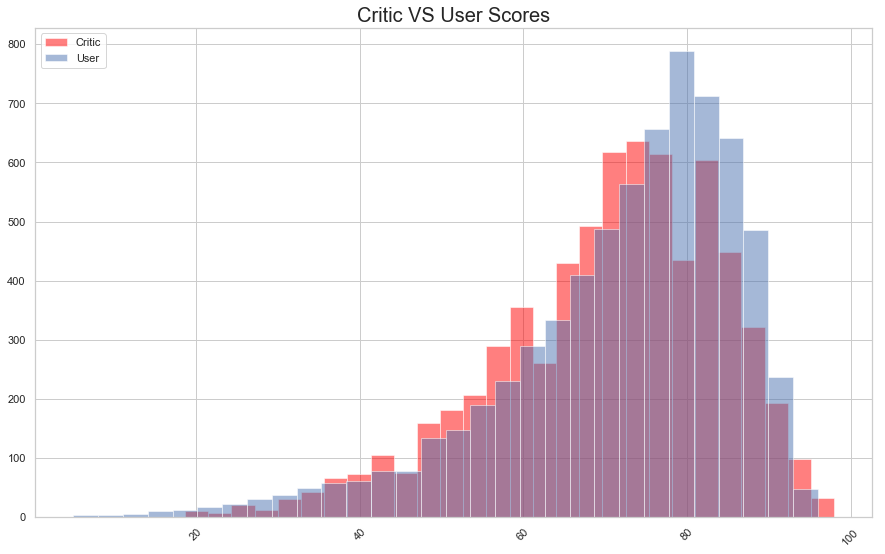

In [394]:
plt.figure(figsize=(15, 9))
plt.title('Critic VS User Scores', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.hist(clean_df['Critic_Score'], alpha=0.5, bins=30, label='Critic', color='red')
plt.hist(clean_df['User_Score']*10, alpha=0.5, bins=30, label='User')
plt.legend(loc='upper left')
plt.show()

Users seem to be more generous with the ratings than critics, with a distribution more slanted towards higher scores

In [498]:
df.groupby('Genre').sum().unstack()

                 Genre       
Year_of_Release  Action          6640613.00
                 Adventure       2596685.00
                 Fighting        1677895.00
                 Misc            3454612.00
                 Platform        1759387.00
                 Puzzle          1140976.00
                 Racing          2457964.00
                 Role-Playing    2972541.00
                 Shooter         2599819.00
                 Simulation      1719697.00
                 Sports          4624690.00
                 Strategy        1349781.00
NA_Sales         Action              863.17
                 Adventure           101.52
                 Fighting            220.51
                 Misc                399.57
                 Platform            444.44
                 Puzzle              121.13
                 Racing              356.86
                 Role-Playing        330.04
                 Shooter             584.83
                 Simulation          180.40
  

Total sales for North America: 4335670000.0


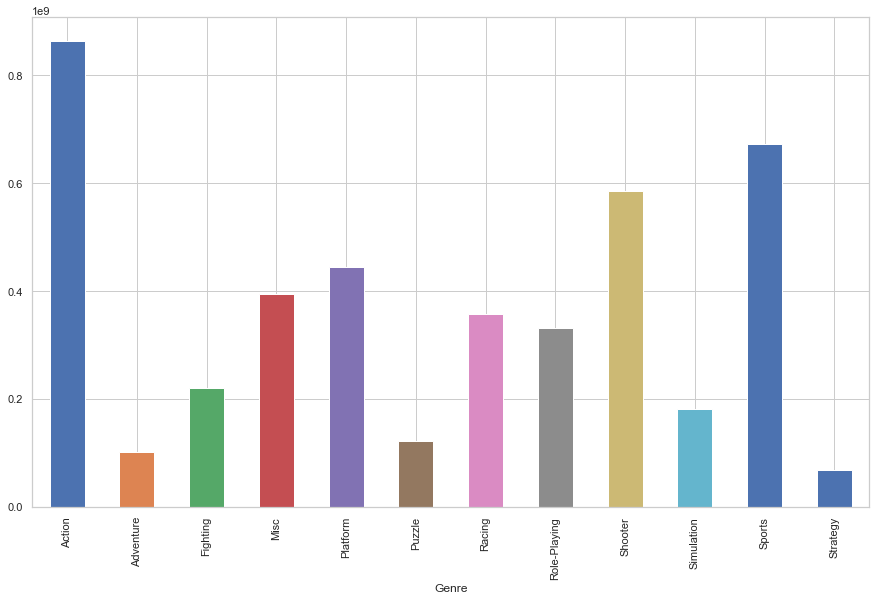

In [786]:
plt.figure(figsize=(15, 9))
df.groupby('Genre').sum()['NA_Sales'].plot(kind='bar')
print('Total sales for North America: '+ str(round(df.groupby('Genre').sum()['NA_Sales'].sum())))

Total sales for Europe: 2400.0


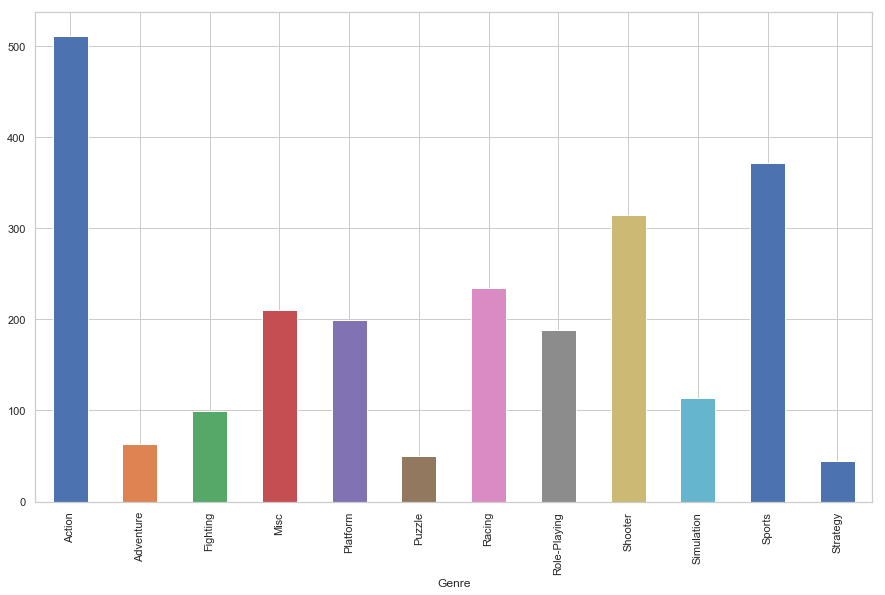

In [504]:
plt.figure(figsize=(15, 9))
df.groupby('Genre').sum()['EU_Sales'].plot(kind='bar')
print('Total sales for Europe: '+ str(round(df.groupby('Genre').sum()['EU_Sales'].sum())))

Total sales for other markets: 783.0


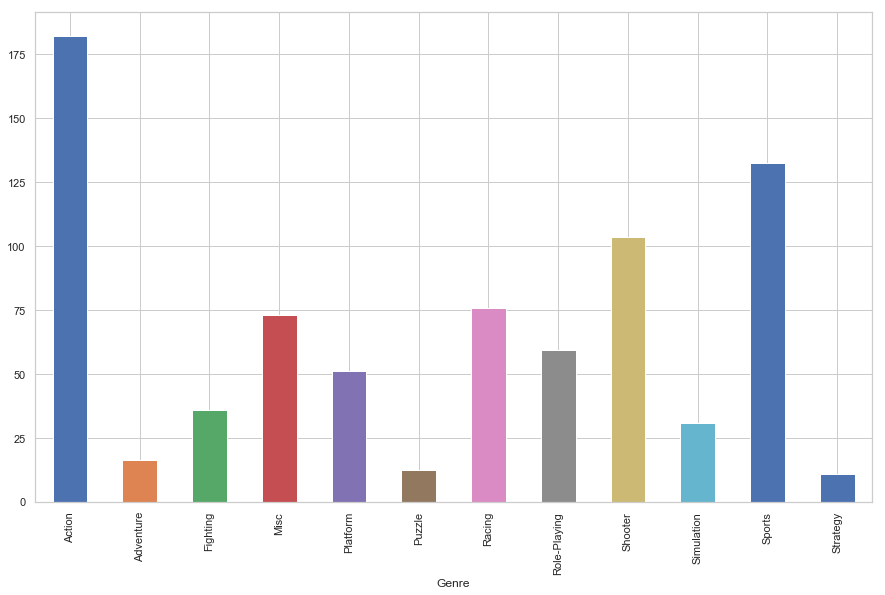

In [505]:
plt.figure(figsize=(15, 9))
df.groupby('Genre').sum()['Other_Sales'].plot(kind='bar')
print('Total sales for other markets: '+ str(round(df.groupby('Genre').sum()['Other_Sales'].sum())))

Total sales for Japan: 1291.0


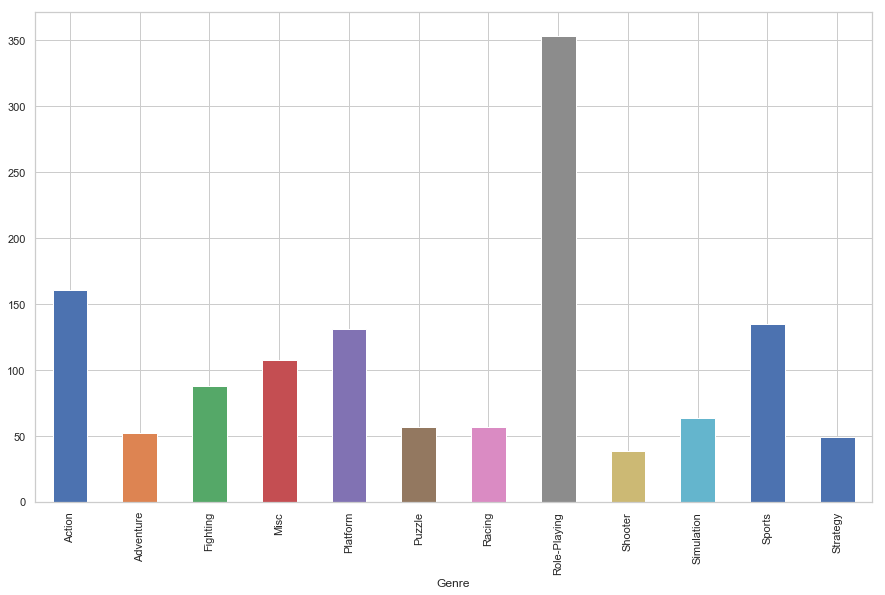

In [506]:
plt.figure(figsize=(15, 9))
df.groupby('Genre').sum()['JP_Sales'].plot(kind='bar')
print('Total sales for Japan: '+ str(round(df.groupby('Genre').sum()['JP_Sales'].sum())))

The Japanese market is very different compared to the rest of the world when it comes to genre preferences. They are much less interested in action, sports, shooters and racing games and more into RPG's

TypeError: Empty 'DataFrame': no numeric data to plot

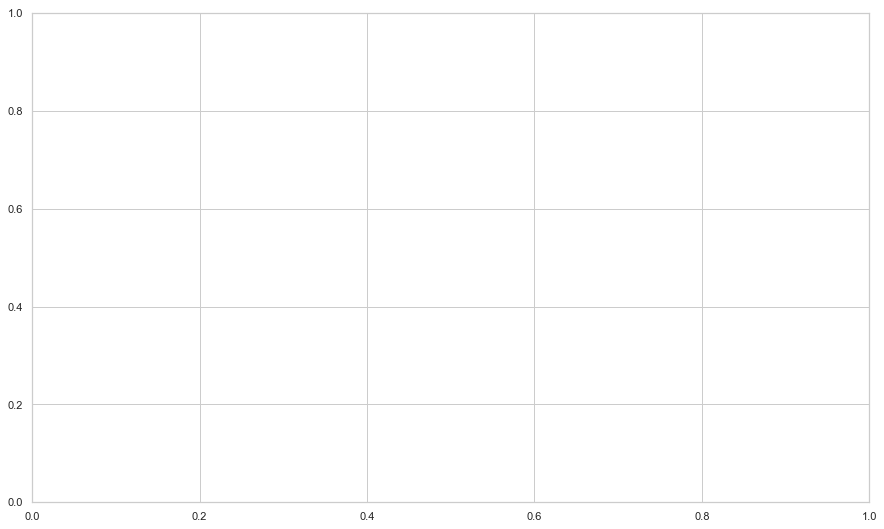

In [788]:
plt.figure(figsize=(15, 9))
df.sum()[1:5].plot(kind='bar')

The North American market is the largest, followed by Europe, Japan and the rest of the world

# Feature Engineering

In [789]:
model_df = df

In [790]:
model_df.isnull().sum().sort_values(ascending=False)/len(df)*100

User_Count         54.539361
User_Score         54.539361
Critic_Count       51.364855
Critic_Score       51.364855
Rating             40.494760
Developer          39.660005
Global_Sales        0.000000
Other_Sales         0.000000
JP_Sales            0.000000
EU_Sales            0.000000
NA_Sales            0.000000
Publisher           0.000000
Genre               0.000000
Year_of_Release     0.000000
Platform            0.000000
Name                0.000000
dtype: float64

Since there are so many games with missing user and critic scores and counts, I will add the mean for each publisher and genre as a replacement. This way a rough estimate will replace missing values based on how well the publisher has been rated per genre.

In [791]:
fill_df = df.groupby(['Publisher','Genre'])['Critic_Score'].mean().reset_index()
fill_df.columns= [ 'Publisher' , 'Genre', 'Avg_Critic_Score'] 
model_df = pd.merge(model_df, fill_df, on =['Genre', 'Publisher'],how='left')
model_df['New_Critic_Score'] = model_df.apply(lambda x: x['Avg_Critic_Score'] if np.isnan(x['Critic_Score']) else x['Critic_Score'], axis =1) 

In [793]:
fill_df = df.groupby(['Publisher','Genre'])['User_Score'].mean().reset_index()
fill_df.columns= [ 'Publisher' , 'Genre', 'Avg_User_Score'] 
model_df = pd.merge(model_df, fill_df, on =['Genre', 'Publisher'])
model_df['New_User_Score'] = model_df.apply(lambda x: x['Avg_User_Score'] if np.isnan(x['User_Score']) else x['User_Score'], axis =1) 

In [794]:
fill_df = df.groupby(['Publisher','Genre'])['User_Count'].mean().reset_index()
fill_df.columns= [ 'Publisher' , 'Genre', 'Avg_User_Count'] 
model_df = pd.merge(model_df, fill_df, on =['Genre', 'Publisher'])
model_df['New_User_Count'] = model_df.apply(lambda x: x['Avg_User_Count'] if np.isnan(x['User_Count']) else x['User_Count'], axis =1) 

In [795]:
fill_df = df.groupby(['Publisher','Genre'])['Critic_Count'].mean().reset_index()
fill_df.columns= [ 'Publisher' , 'Genre', 'Avg_Critic_Count'] 
model_df = pd.merge(model_df, fill_df, on =['Genre', 'Publisher'])
model_df['New_Critic_Count'] = model_df.apply(lambda x: x['Avg_Critic_Count'] if np.isnan(x['Critic_Count']) else x['Critic_Count'], axis =1) 

In [796]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16412 entries, 0 to 16411
Data columns (total 24 columns):
Name                16412 non-null object
Platform            16412 non-null object
Year_of_Release     16412 non-null float64
Genre               16412 non-null object
Publisher           16412 non-null object
NA_Sales            16412 non-null float64
EU_Sales            16412 non-null float64
JP_Sales            16412 non-null float64
Other_Sales         16412 non-null float64
Global_Sales        16412 non-null float64
Critic_Score        7982 non-null float64
Critic_Count        7982 non-null float64
User_Score          7461 non-null float64
User_Count          7461 non-null float64
Developer           9903 non-null object
Rating              9766 non-null object
Avg_Critic_Score    14486 non-null float64
New_Critic_Score    14486 non-null float64
Avg_User_Score      14202 non-null float64
New_User_Score      14202 non-null float64
Avg_User_Count      14202 non-null float64


In [799]:
model_df.isnull().sum().sort_values(ascending=False)/len(df)*100

User_Score          54.539361
User_Count          54.539361
Critic_Count        51.364855
Critic_Score        51.364855
Rating              40.494760
Developer           39.660005
New_User_Count      13.465757
Avg_User_Count      13.465757
New_User_Score      13.465757
Avg_User_Score      13.465757
Avg_Critic_Count    11.735316
New_Critic_Count    11.735316
Avg_Critic_Score    11.735316
New_Critic_Score    11.735316
Global_Sales         0.000000
Other_Sales          0.000000
JP_Sales             0.000000
EU_Sales             0.000000
NA_Sales             0.000000
Publisher            0.000000
Genre                0.000000
Year_of_Release      0.000000
Platform             0.000000
Name                 0.000000
dtype: float64

By replacing missing values, their percentage has been reduced from over 50% to about 12%

In [810]:
basic_df = model_df[['Global_Sales','Publisher','Platform','Genre','Year_of_Release','New_Critic_Score','New_Critic_Count','New_User_Score','New_User_Count']]

In [811]:
basic_df.dropna(inplace=True)

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [812]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14091 entries, 0 to 16400
Data columns (total 9 columns):
Global_Sales        14091 non-null float64
Publisher           14091 non-null object
Platform            14091 non-null object
Genre               14091 non-null object
Year_of_Release     14091 non-null float64
New_Critic_Score    14091 non-null float64
New_Critic_Count    14091 non-null float64
New_User_Score      14091 non-null float64
New_User_Count      14091 non-null float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [813]:
basic_df = pd.get_dummies(basic_df)

# Model

Linear Regression

In [814]:
regr = linear_model.LinearRegression()
X = basic_df.drop('Global_Sales',axis=1)
Y = basic_df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print('With 30% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))

With 30% Holdout: 0.22901142725476187


In [815]:
cross_val_score(regr, X, Y, cv=10)

array([-1.24025511e-02, -2.49295649e+15, -1.37841529e+17, -5.61474155e+14,
       -1.87533206e+14, -1.07386051e+16, -4.87627625e+14, -3.40110073e+17,
       -8.06006301e+19, -1.93627925e+19])

Random Forest

In [818]:
rfc = ensemble.RandomForestRegressor(n_estimators=1000, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print('With 30% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))

With 30% Holdout: 0.2673091174568577


In [819]:
cross_val_score(rfc, X, Y, cv=10)

array([  0.01941231,  -0.13261023,   0.15771853,   0.18464341,
         0.09417979,   0.02098118,  -0.1676873 ,  -1.33781795,
        -3.51241615, -15.05162257])